In [3]:
#download
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import plotly.express as graph
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import numpy
import pandas
from pandas import read_csv

url='./mbti_unclean.csv'
data=read_csv(url)

df = pandas.DataFrame(data)
print(df)

      type                                              posts
0     ISTJ  'More like calling close to 10 times from 1 am...
1     ISTJ  'Agree with the other answers to this posted a...
2     ISTJ  'On paper, I know that. Several people have sa...
3     ISTJ  'Hello all, I'm a senior in college and workin...
4     ISTJ  'Poverty is a fact of life.  Sometimes it's th...
...    ...                                                ...
8205  ENTJ  'Thank you all for the replies I really apprec...
8206  ENTJ  'http://www.youtube.com/watch?v=l1p_NHFd8jM&fe...
8207  ENTJ  'everydaydreams  Interesting since she's typic...
8208  ENTJ  You tell him! Christ.  I do wanna thank everyo...
8209  ENTJ  'Yeah, except I lie a lot, especially to peopl...

[8210 rows x 2 columns]


**DATA ANALYSIS**

Null Values: 

type     0
posts    0
dtype: int64


No of posts for each mbti Personality: 

INFP    1804
INFJ    1451
INTP    1276
INTJ    1068
ENTP     657
ENFP     638
ISTP     314
ISFP     248
ENTJ     208
ENFJ     167
ISTJ     154
ISFJ     124
ESTP      70
ESFP      29
ESTJ       2
Name: type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)




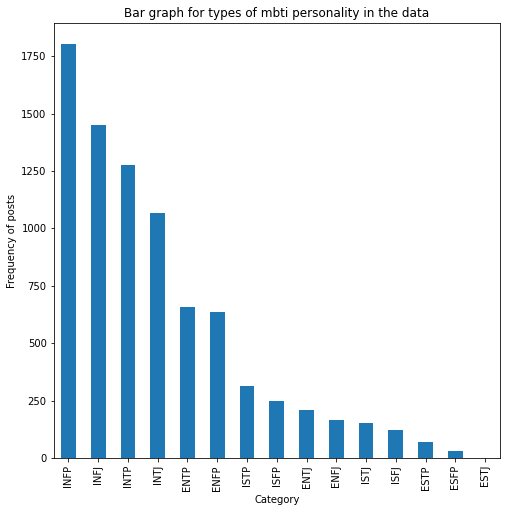

In [5]:
#Check for null values
print("Null Values: \n")
print(data.isnull().sum())

#Plotting frequency of different categories
countCategory=data.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

#Frequency vs label graphs
#Bar Graph
print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")
#pie graph
graph.pie(data,names='type',title='Pie graph for types of mbti personality in the data', height=600, width=600)

Data is extremely imbalanced. This might cause overfitting to happen

In [6]:

#Description about data
print("Dataset Description: \n", data.describe())
print("\n")
#Info about data
print("Datset Info: \n", data.info())
print("\n")

#Shape data
print("Dimensions of Dataset: ",data.shape)
print("\n\n")

Dataset Description: 
         type                                              posts
count   8210                                               8210
unique    15                                               8210
top     INFP  'More like calling close to 10 times from 1 am...
freq    1804                                                  1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8210 non-null   object
 1   posts   8210 non-null   object
dtypes: object(2)
memory usage: 128.4+ KB
Datset Info: 
 None


Dimensions of Dataset:  (8210, 2)





AxesSubplot(0.125,0.125;0.775x0.755)


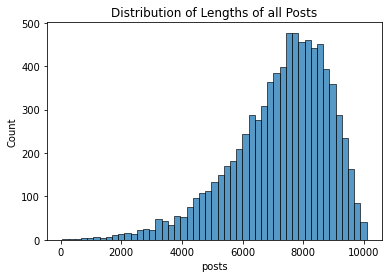

In [7]:
#Plot to show the distribution of Lengths of all Posts
df= data["posts"].apply(len)
graph=sns.histplot(df)
graph.set_title("Distribution of Lengths of all Posts")
print(graph)

In [8]:
#Helper function to create a list for type indicators 
def helper(ls, ch1, Type, ind):
  i=0
  for row in Type:
    if row[ind]==ch1:
      ls[i]=1
    else :
      ls[i]=0
    i= i+1
  return ls

'''This function takes dataset as input 
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''
#function to add columns for 4 type indicators
def Add_Type_Indicators(data):
  IE = np.zeros(data.shape[0])
  NS = np.zeros(data.shape[0])
  TF = np.zeros(data.shape[0])
  JP = np.zeros(data.shape[0])

  Type= list(data["type"])

  IE= helper(IE, 'I', Type, 0)
  NS= helper(NS, 'N', Type, 1)
  TF= helper(TF, 'T', Type, 2)
  JP= helper(JP, 'J', Type, 3)
  

  data.insert(2, "IE", IE, True)
  data.insert(3, "NS", NS, True)
  data.insert(4, "TF", TF, True)
  data.insert(5, "JP", JP, True)

data_copy=data.copy(deep=True)
Add_Type_Indicators(data_copy)

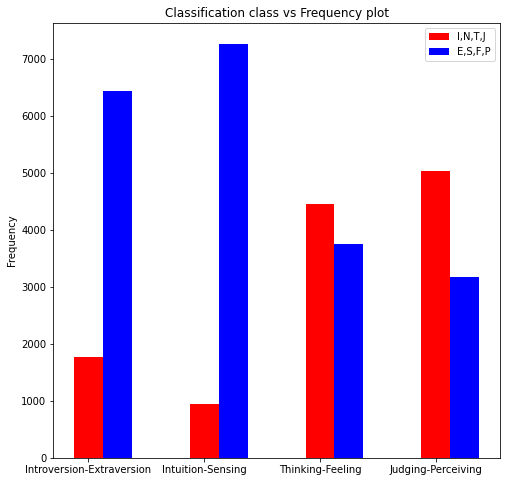

In [9]:
# Plotting Classification class vs Frequency plot for IE, NS, TF, JP

I,N,T,J=data_copy['IE'].value_counts()[0],data_copy['NS'].value_counts()[0],data_copy['TF'].value_counts()[0],data_copy['JP'].value_counts()[0]
E,S,F,P=data_copy['IE'].value_counts()[1],data_copy['NS'].value_counts()[1],data_copy['TF'].value_counts()[1],data_copy['JP'].value_counts()[1]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='red',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='blue')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.094805 -0.076270  0.187097
NS -0.094805  1.000000 -0.084669  0.065791
TF -0.076270 -0.084669  1.000000 -0.008722
JP  0.187097  0.065791 -0.008722  1.000000

HeatMap Visual:

AxesSubplot(0.125,0.125;0.62x0.755)


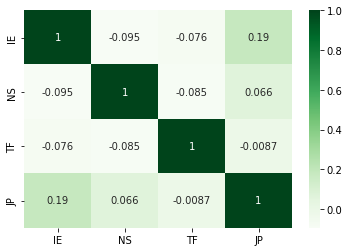

In [10]:
#Correlation matrix and Heatmap Visuals

columns=['IE','NS','TF','JP']
matrix=data_copy[columns].corr()

print('Correlation Matrix:\n',matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix,annot=True,cmap='Greens'))

In [11]:
data_copy_1=data_copy.copy(deep=True)

**DATA PREPROCESSING**

In [12]:
data_copy=data_copy_1.copy(deep=True)
#Pre-Processing
nltk.download('omw-1.4')
#converting all text/posts to lower case
data_copy["posts"] = data_copy["posts"].str.lower()

'''This function takes a list of texual data as input.
   It performs pre-processing and natural language processing on the data.
   It returns the processed textual data list as output.'''

#remove url links
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)
  
  pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
  post_temp=data_copy._get_value(i, 'posts')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\W+')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[0-9]')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing extra spaces from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\s+')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
  data_copy._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
  data_copy._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
  data_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#data before preprocessing 
print("Data (post 2) before preprocessing :", data.iloc[2,1], "\n")
#data after preprocessing
print("Data (post 2) after preprocessing :", data_copy.iloc[2,1], "\n")

Data (post 2) before preprocessing : 'On paper, I know that. Several people have said the same thing, and reinforcement is probably what I'm looking for. Thank you. I've never felt pain like this before.|||I've been dating an INTJ male for over three years. We've been living together for one. Over the past year, I've noticed things becoming stale and unexciting. I put in effort for a long time and...|||Instead of describing myself as cold-hearted, I think I'm more cool-headed.   But people take it the wrong way. I've been described as soulless once and as an ice queen many times.|||Well when I was first getting to know my [future] boyfriend, first of all he was in charge (college fencing club, he was a former member turned coach) and it's common for me to eye new authorities...|||- Do you know any? I've been dating one for two years, a month and eleven days and living with him for three-ish months. - Do you like them? I'm pretty sure I do. - What do you think about them?...|||I've alwa

In [15]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(data['type'].unique()):
    personality_data = data[data['type'] == personality]
    imp_words = get_top_n_imp_words(personality_data['posts'],data_copy['posts'])
    imp_words_dict[personality] = imp_words

100%|██████████| 15/15 [01:13<00:00,  4.90s/it]


In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_type_properties(types):
  extracted_data=data_copy[data['type']==types]
  texts=" ".join(extracted_data['posts'].tolist())
  worldcount=WordCloud(background_color="white", max_words=200,
                   stopwords=remove_words, contour_width=3)
  worldcount.generate(texts)
  #Plot
  plt.figure(figsize=[20,6])
  plt.subplot(121)
  plt.imshow(worldcount, interpolation='bilinear')
  plt.axis("off")
  plt.subplot(122)
  tuples = imp_words_dict[types]
  words = [x[0] for x in tuples]
  imp = [x[1] for x in tuples]
  sns.barplot(y = words,x = imp)
  plt.title(f'Important Words for {types}')
  plt.xlabel('Importance - tfidf value')

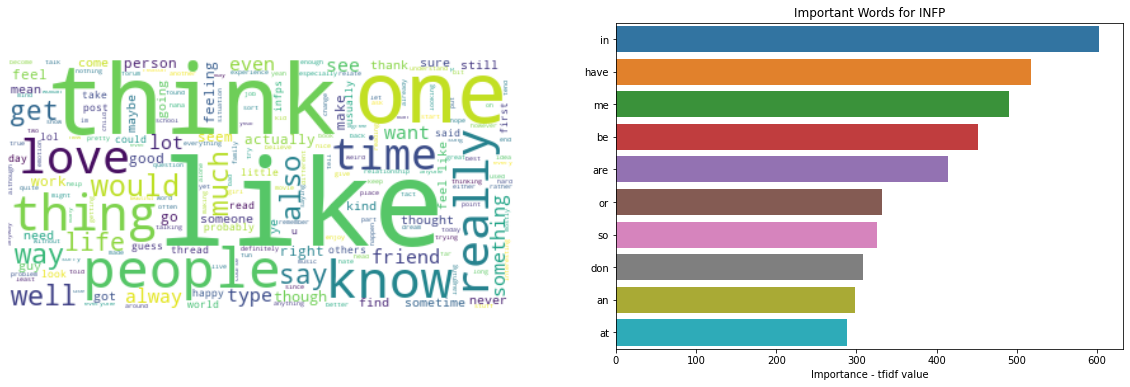

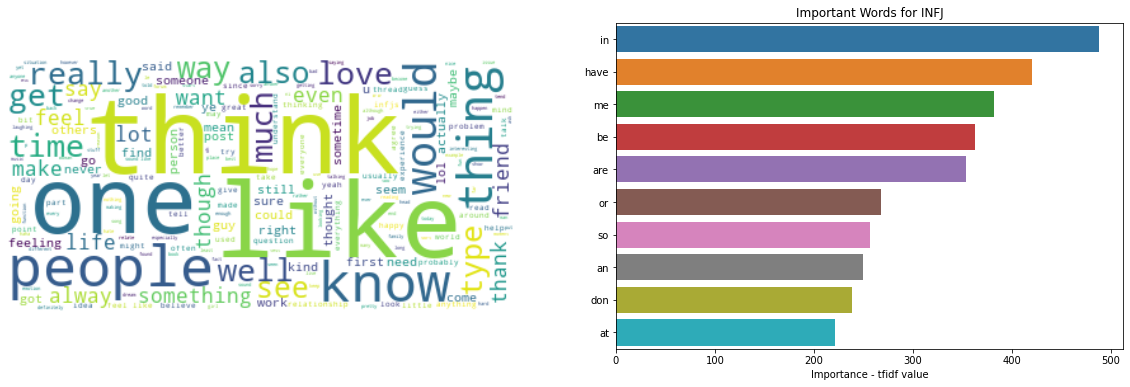

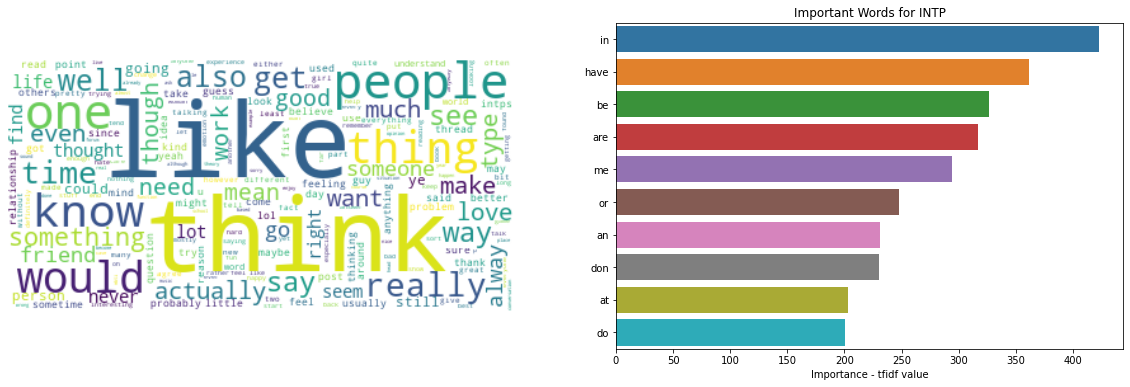

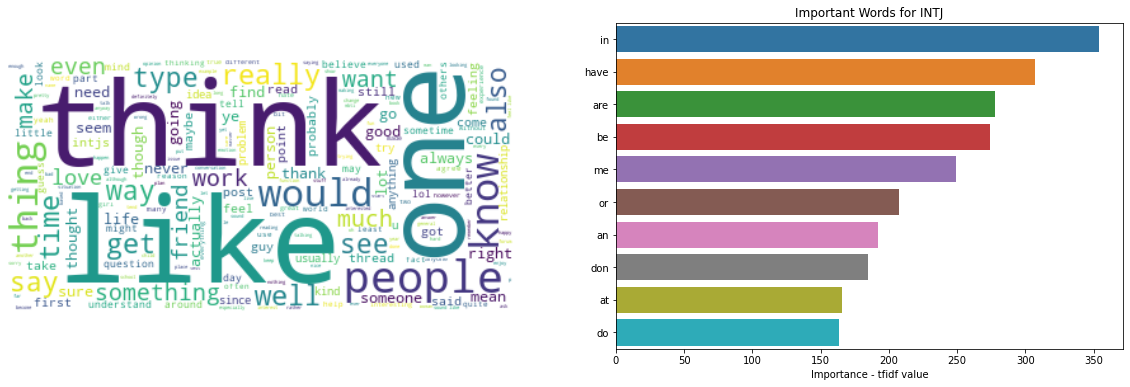

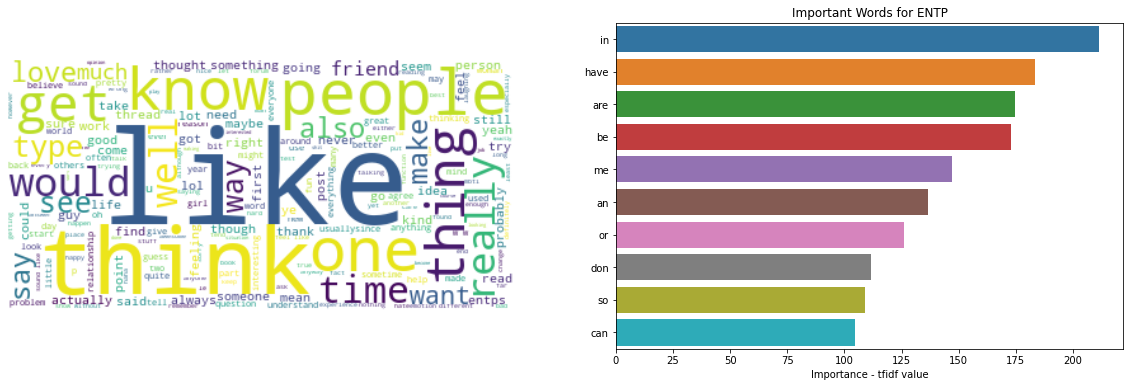

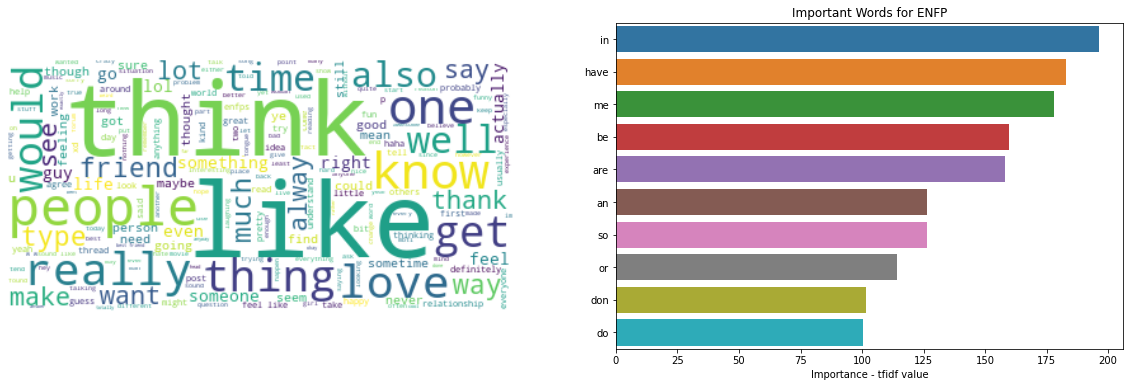

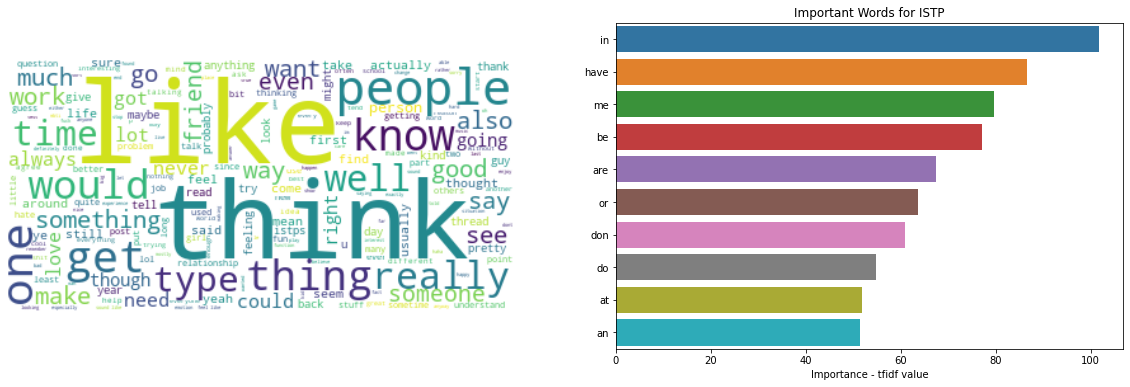

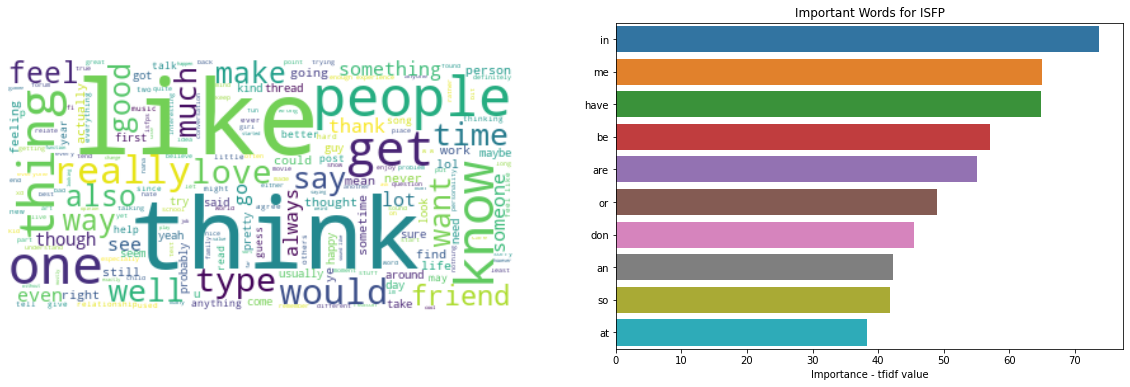

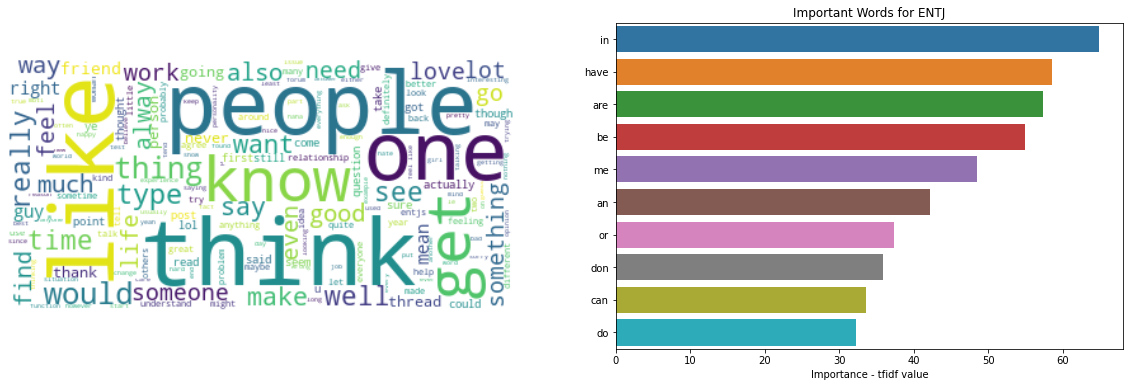

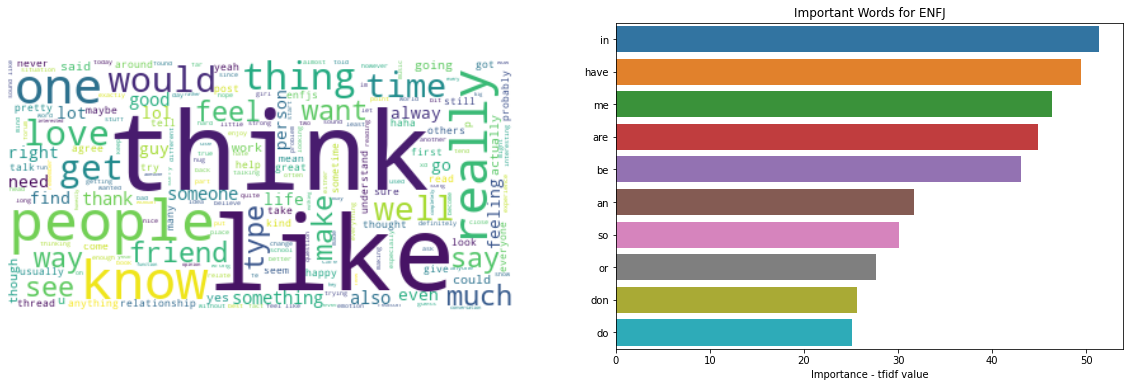

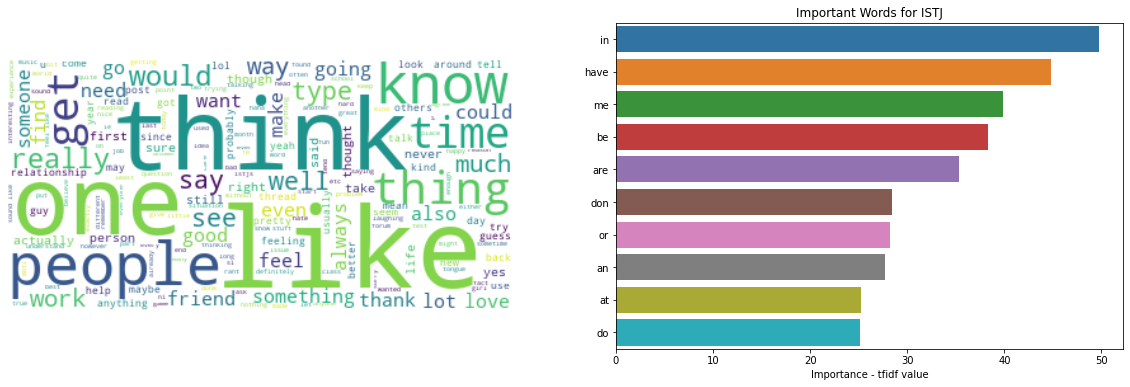

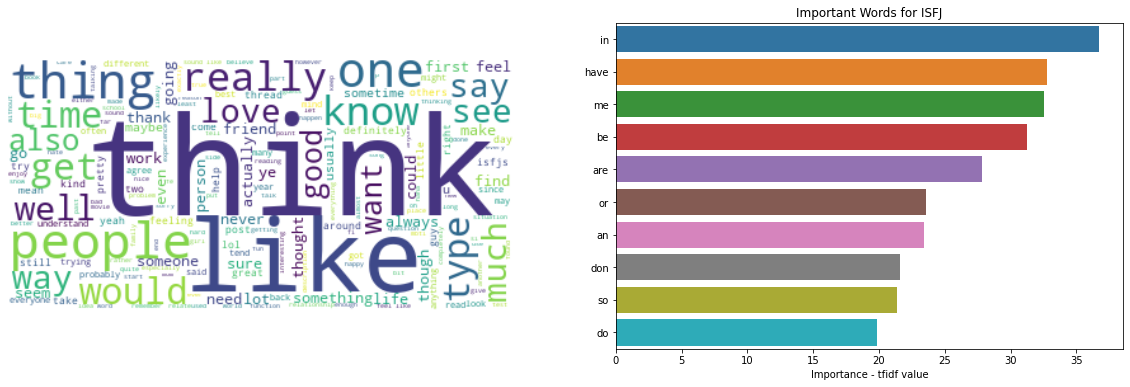

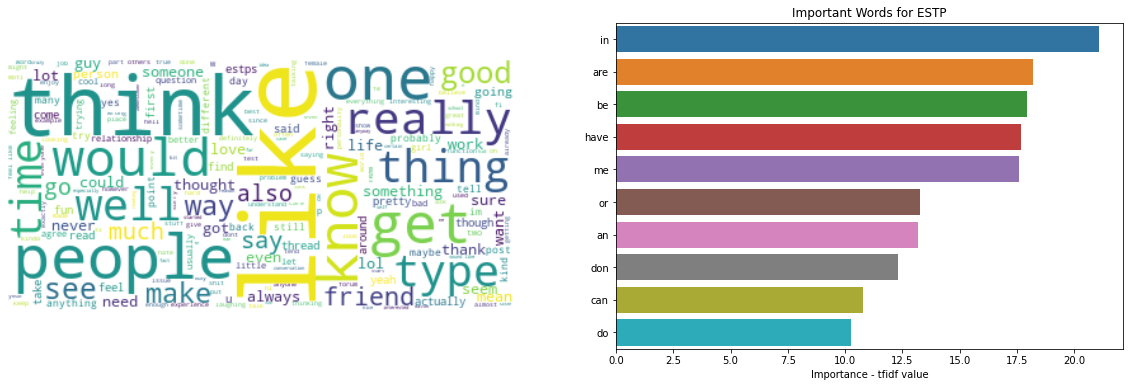

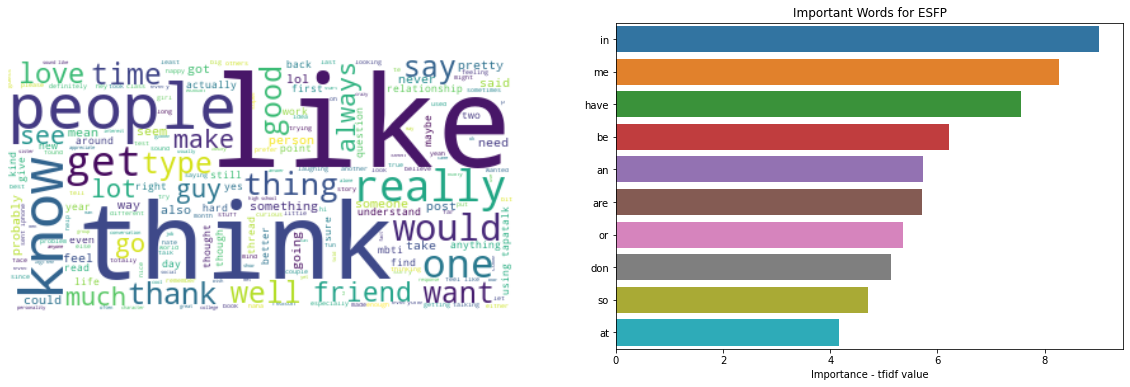

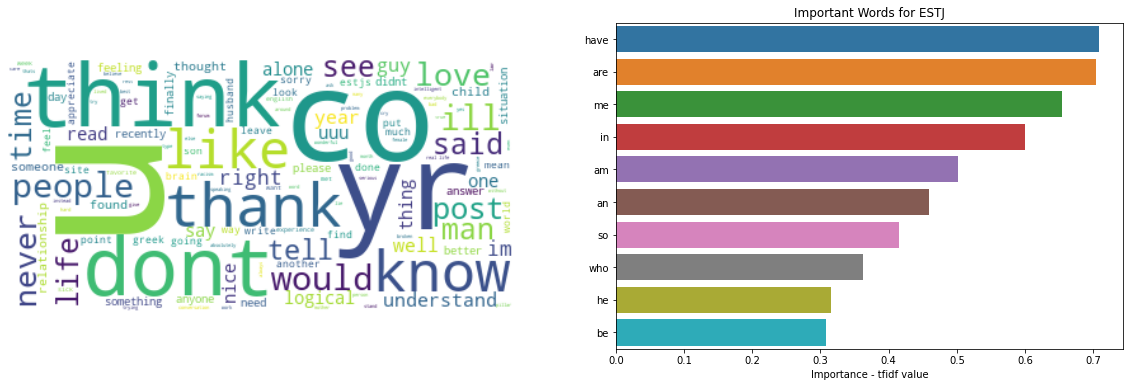

In [17]:
for i in countCategory.index:
  show_type_properties(i)

In [18]:
del data_copy['type']

#Feature Selection:

In [19]:
#Finding features using CountVectorizer by converting the posts into matrix of word count
post_list=[]
for i,j in data_copy.posts.iteritems():
  post_list.append(j)

vector=CountVectorizer(stop_words='english',max_features=1500)
features=vector.fit_transform(post_list)
# print(finalfeatures.shape)

#tf-idf to weigh the importance of words(features) across all posts and select more relevent features
transform = TfidfTransformer()
finalfeatures =  transform.fit_transform(features).toarray()

In [20]:
print(finalfeatures.shape)

(8210, 1500)


In [21]:
X_data=finalfeatures
Y_data= data_copy.iloc[:,1:5]

In [22]:
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=123,stratify=Y_data)


#Models analysis and Methodology:

In [74]:
#Function to predict labels for X_test of the given model
'''This function takes 4 GridSearchCV model as input.
  It fits all 4 models with thier resoective training data.
  It fincs the best estimator of GridSearchCV and uses 
  it to return predicted values of 4 test sets'''

def predict(model1, model2, model3, model4):
  #IE prediction
  ypredIE=model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
  #NS prediction
  ypredNS=model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
  #TF prediction
  ypredTF=model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
  #JP prediction
  ypredJP=model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

  return ypredIE, ypredNS, ypredTF, ypredJP


#Function to print Classification Report of the given model
'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
  #Classification Report for Introversion(I) / Extroversion(E)
  print("Classification Report for Introversion(I) / Extroversion(E): \n ")
  print(classification_report(Y_test_IE, ypredIE))
  accuracyIE=accuracy_score(Y_test_IE,ypredIE)
  print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
  print("\n")

  #Classification Report for Intuition(N) / Sensing(S)
  print("Classification Report for Intuition(N) / Sensing(S): \n ")
  print(classification_report(Y_test_NS, ypredNS))
  accuracyNS=accuracy_score(Y_test_NS,ypredNS)
  print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
  print("\n")

  #Classification Report for Thinking(T) / Feeling(F)
  print("Classification Report for Thinking(T) / Feeling(F): \n ")
  print(classification_report(Y_test_TF, ypredTF))
  accuracyTF=accuracy_score(Y_test_TF,ypredTF)
  print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
  print("\n")

  #Classification Report for Judging(J) / Perceiving(P)
  print("Classification Report for Judging(J) / Perceiving(P): \n ")
  print(classification_report(Y_test_JP, ypredJP))
  accuracyJP=accuracy_score(Y_test_JP,ypredJP)
  print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
  print("\n")

  accuracy=[accuracyIE,accuracyNS,accuracyTF,accuracyJP]
  return np.mean(accuracy)


#Function to print Confusion matrix for the given model
'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
  #Confusion matrix for Introversion(I) / Extroversion(E):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Blues_r');
  plt.ylabel('Y_test_IE');
  plt.xlabel('ypredIE');
  plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
  plt.show()

  #Confusion matrix for Intuition(N) / Sensing(S):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Greens_r');
  plt.ylabel('Y_test_NS');
  plt.xlabel('ypredNS');
  plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
  plt.show()

  #Confusion matrix for Judging(J) / Perceiving(P): 
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Reds_r');
  plt.ylabel('Y_test_TF');
  plt.xlabel('ypredTF');
  plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size = 17);
  plt.show()

  #onfusion matrix for Judging(J) / Perceiving(P):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Purples_r');
  plt.ylabel('Y_test_JP');
  plt.xlabel('ypredJP');
  plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
  plt.show()


#Function to print roc_auc_curve for the given model
'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''
def print_roc_auc_curve(probIE, probNS, probTF, probJP):
  
  fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
  fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
  fp_TF, tp_TF, val = roc_curve(Y_test_TF, probTF[:,1])
  fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

  plt.figure()
  plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
  plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
  plt.plot(fp_TF, tp_TF, linestyle='--', color='pink', label='Thinking(T) / Feeling(F)')
  plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

# Naive Bayes Model

In [83]:
#Naive Bayes Model
naivegb=GaussianNB()
#Apply stratified cross validation
grid1=GridSearchCV(naivegb,{},cv=5)
grid2=GridSearchCV(naivegb,{},cv=5)
grid3=GridSearchCV(naivegb,{},cv=5)
grid4=GridSearchCV(naivegb,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
naive_bayes_accuracy = print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)
nb=naive_bayes_accuracy

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.35      0.55      0.42       354
         1.0       0.85      0.71      0.78      1288

    accuracy                           0.68      1642
   macro avg       0.60      0.63      0.60      1642
weighted avg       0.74      0.68      0.70      1642

Accuracy for Introversion(I) / Extroversion(E):  0.6784409257003654 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.25      0.54      0.34       189
         1.0       0.93      0.79      0.85      1453

    accuracy                           0.76      1642
   macro avg       0.59      0.66      0.60      1642
weighted avg       0.85      0.76      0.79      1642

Accuracy for Intuition(N) / Sensing(S):  0.7606577344701584 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

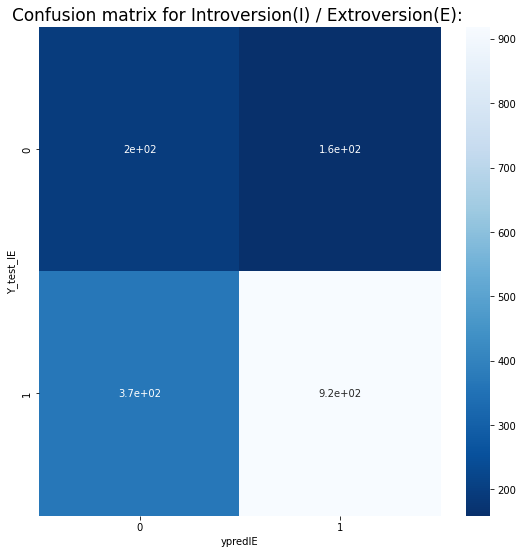

<Figure size 432x288 with 0 Axes>

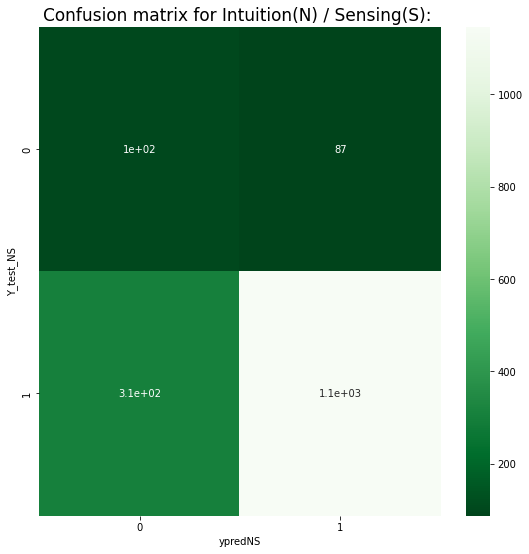

<Figure size 432x288 with 0 Axes>

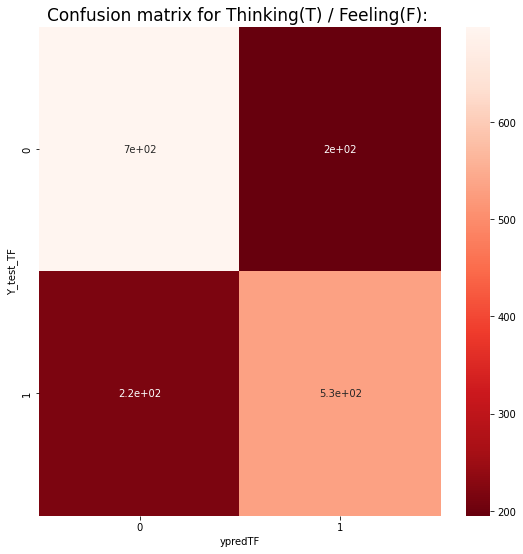

<Figure size 432x288 with 0 Axes>

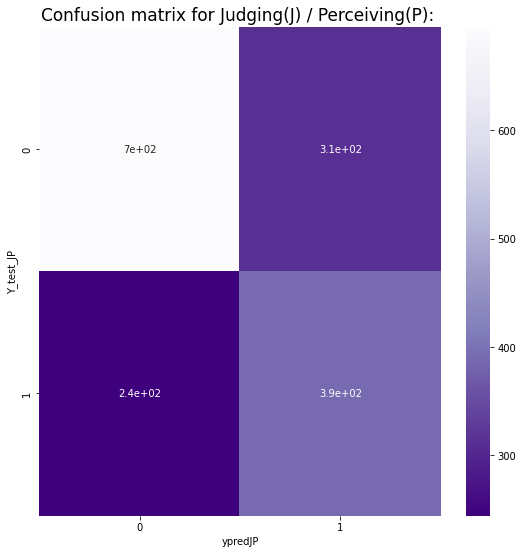

In [26]:
#print confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

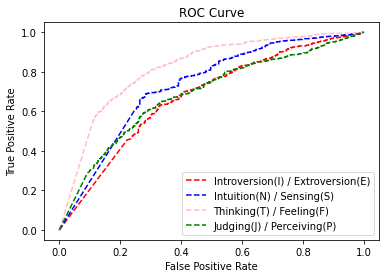

In [27]:
#plot ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

#Logistic regression

In [84]:
#Logistic Regression model
log =LogisticRegression(max_iter=500)
#Apply stratified cross validation
grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
logistic_regression_accuracy = print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)
lr=logistic_regression_accuracy


Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.80      0.19      0.31       354
         1.0       0.82      0.99      0.89      1288

    accuracy                           0.81      1642
   macro avg       0.81      0.59      0.60      1642
weighted avg       0.81      0.81      0.77      1642

Accuracy for Introversion(I) / Extroversion(E):  0.8148599269183922 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.42      0.03      0.05       189
         1.0       0.89      1.00      0.94      1453

    accuracy                           0.88      1642
   macro avg       0.65      0.51      0.49      1642
weighted avg       0.83      0.88      0.84      1642

Accuracy for Intuition(N) / Sensing(S):  0.8836784409257004 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

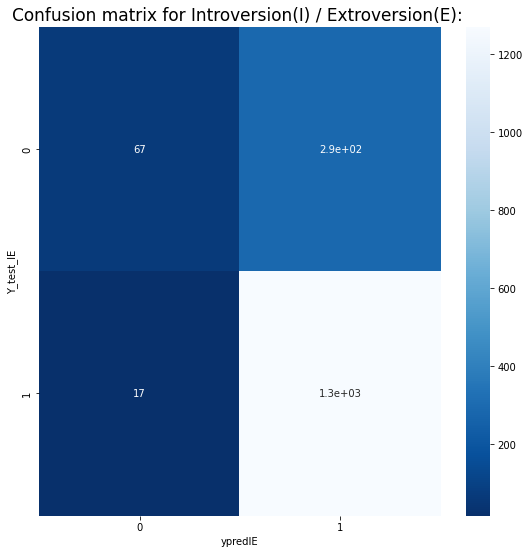

<Figure size 432x288 with 0 Axes>

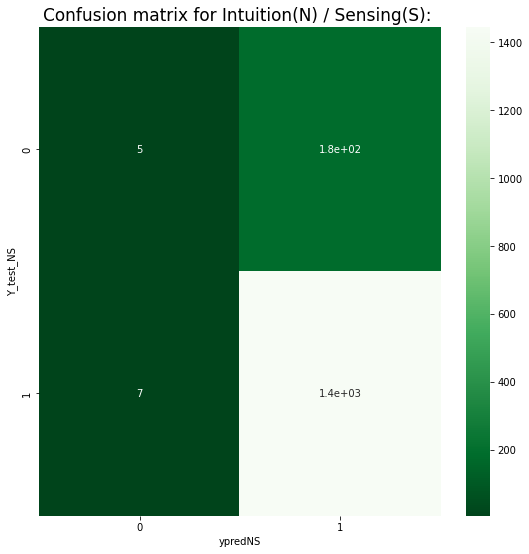

<Figure size 432x288 with 0 Axes>

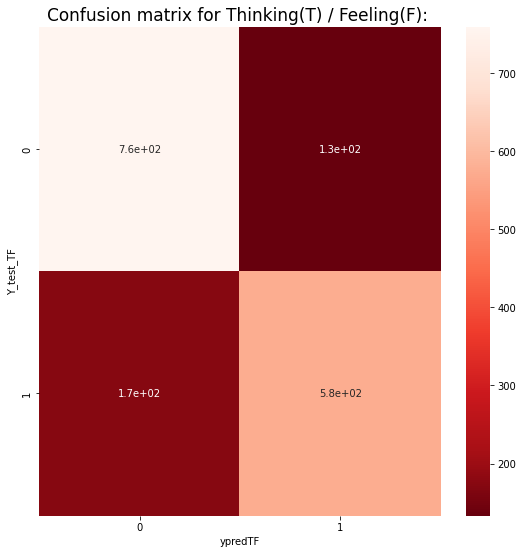

<Figure size 432x288 with 0 Axes>

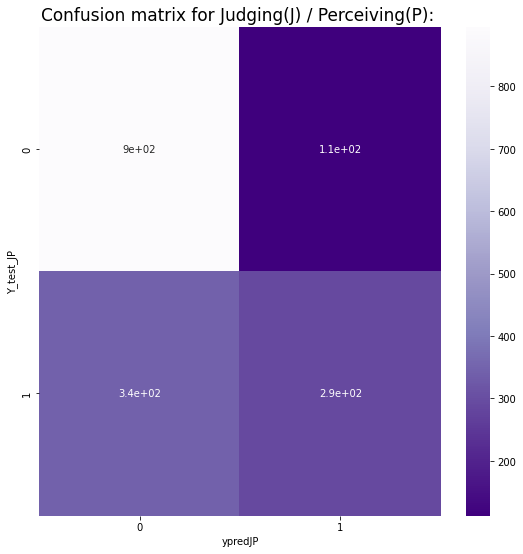

In [29]:
#Plot confusion matix for all four dimensions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

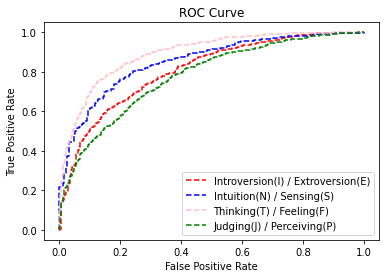

In [30]:
#Plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

# KNN Classifier

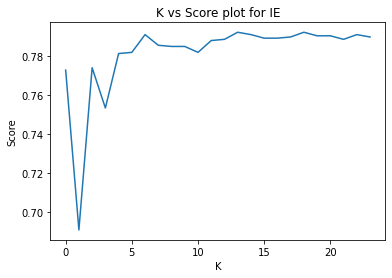

Maximum Accuracy of 0.792326431181486 at k=14


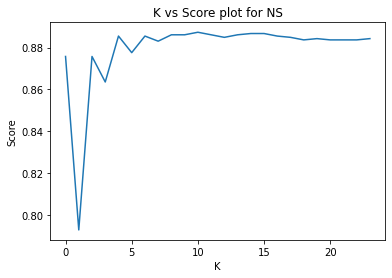

Maximum Accuracy of 0.8873325213154689 at k=11


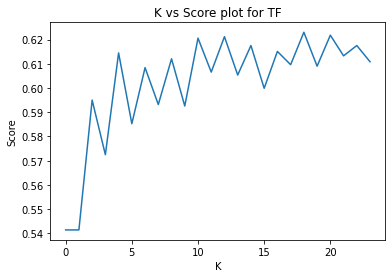

Maximum Accuracy of 0.623020706455542 at k=19


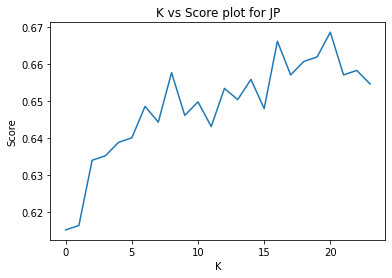

Maximum Accuracy of 0.623020706455542 at k=19


In [31]:
#K-Nearest Neighbor Model

'''Below we find the best value of K for our model.
   Analysis of accuracy vs K graph gives us the best value of K
   Analysis of accuracy vs K graph are plotted.'''
def plot_graph(val,xlab,ylab,title):
  plt.figure()
  plt.plot(val)
  plt.ylabel(ylab)
  plt.xlabel(xlab);
  plt.title(title)
  plt.show()

#IE prediction
k1_score=[]
for i in range(1,25):
  k1=KNeighborsClassifier(n_neighbors=i)
  k1.fit(X_train_IE,Y_train_IE)
  k1_score.append(k1.score(X_test_IE,Y_test_IE))

df1=pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

#NS prediction
k2_score=[]
for i in range(1,25):
  k2=KNeighborsClassifier(n_neighbors=i)
  k2.fit(X_train_NS,Y_train_NS)
  k2_score.append(k2.score(X_test_NS,Y_test_NS))

df2=pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

#TF prediction
k3_score=[]
for i in range(1,25):
  k3=KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_train_TF,Y_train_TF)
  k3_score.append(k3.score(X_test_TF,Y_test_TF))

df3=pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

#JP prediction
k4_score=[]
for i in range(1,25):
  k4=KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_train_JP,Y_train_JP)
  k4_score.append(k4.score(X_test_JP,Y_test_JP))

df4=pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')


In [32]:
kbest=KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
ypredIE=kbest.fit(X_train_IE,Y_train_IE).predict(X_test_IE)
probIE= kbest.predict_proba(X_test_IE)

kbest=KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
ypredNS=kbest.fit(X_train_NS,Y_train_NS).predict(X_test_NS)
probNS= kbest.predict_proba(X_test_NS)

kbest=KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
ypredTF=kbest.fit(X_train_TF,Y_train_TF).predict(X_test_TF)
probTF= kbest.predict_proba(X_test_TF)

kbest=KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
ypredJP=kbest.fit(X_train_JP,Y_train_JP).predict(X_test_JP)
probJP= kbest.predict_proba(X_test_JP)

In [85]:
#Print KNN Results
knn_accuracy = print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)
knn=knn_accuracy

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.80      0.19      0.31       354
         1.0       0.82      0.99      0.89      1288

    accuracy                           0.81      1642
   macro avg       0.81      0.59      0.60      1642
weighted avg       0.81      0.81      0.77      1642

Accuracy for Introversion(I) / Extroversion(E):  0.8148599269183922 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.42      0.03      0.05       189
         1.0       0.89      1.00      0.94      1453

    accuracy                           0.88      1642
   macro avg       0.65      0.51      0.49      1642
weighted avg       0.83      0.88      0.84      1642

Accuracy for Intuition(N) / Sensing(S):  0.8836784409257004 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

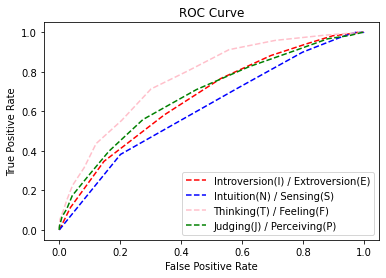

In [34]:
#Plot ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP)

#SGD Classifier:

In [86]:
#SGDClassifier Model
sgd_model= SGDClassifier(loss='log') 
#Apply cross validation
grid1=GridSearchCV(sgd_model,{},cv=5)
grid2=GridSearchCV(sgd_model,{},cv=5)
grid3=GridSearchCV(sgd_model,{},cv=5)
grid4=GridSearchCV(sgd_model,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four axis
sgd_accuracy = print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)
sgd=sgd_accuracy

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.82      0.17      0.29       354
         1.0       0.81      0.99      0.89      1288

    accuracy                           0.81      1642
   macro avg       0.82      0.58      0.59      1642
weighted avg       0.82      0.81      0.76      1642

Accuracy for Introversion(I) / Extroversion(E):  0.8136419001218027 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.44      0.02      0.04       189
         1.0       0.89      1.00      0.94      1453

    accuracy                           0.88      1642
   macro avg       0.67      0.51      0.49      1642
weighted avg       0.84      0.88      0.84      1642

Accuracy for Intuition(N) / Sensing(S):  0.8842874543239951 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

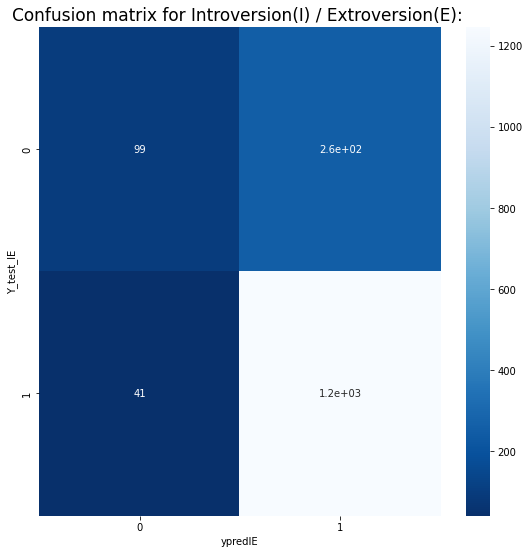

<Figure size 432x288 with 0 Axes>

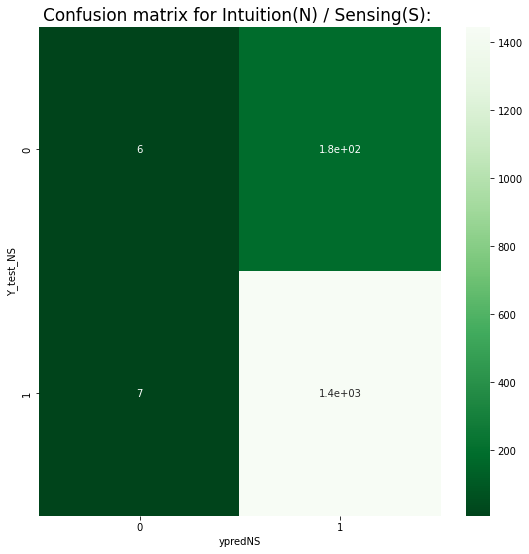

<Figure size 432x288 with 0 Axes>

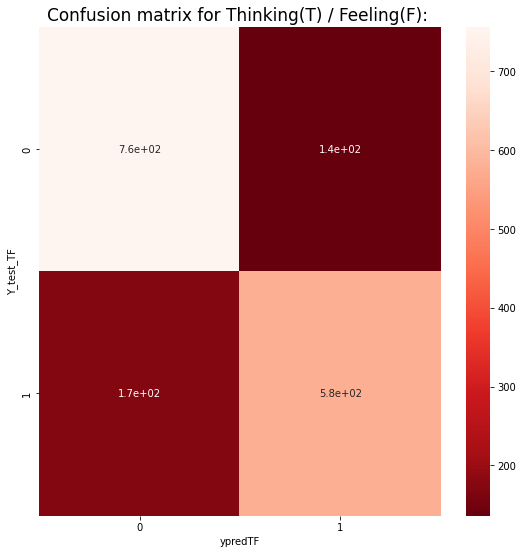

<Figure size 432x288 with 0 Axes>

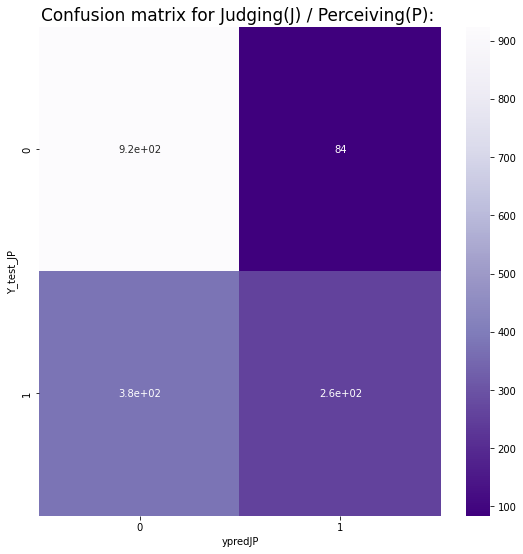

In [36]:
#Plot Confusion Matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

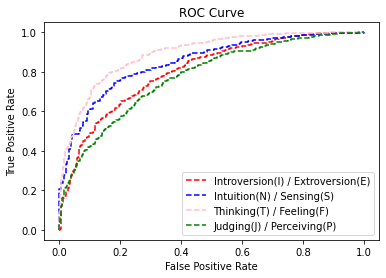

In [37]:
#plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP))

# Accuracy Comparison

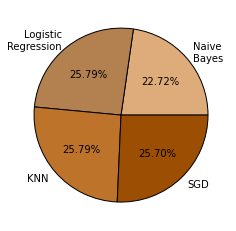

In [109]:
labels = ['Naive\nBayes','Logistic\nRegression','KNN','SGD']
size = [nb,lr,knn,sgd]
mycolors = ["#deac7a", "#b38150", "#bd732a", "#9c4f02"]
plt.pie(size, labels = labels, colors = mycolors,wedgeprops=
       {'edgecolor':'black'},autopct='%1.2f%%')

plt.show() 